Is GPPPC related to ENACC?
This notebook contains Washington DC data

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_excel('../data/GDPPC_ENACC_ state_total_10_20.xlsx')
df.head(9)

,STATE,ST_AB,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
0,Alabama,AL,2010,1.772492e+11,4785514,37038.696366,3029,1.90
1,Alaska,AK,2010,5.333160e+10,713982,74696.000740,412,0.26
2,Arizona,AZ,2010,2.511530e+11,6407342,39197.689151,3840,2.50
3,Arkansas,AR,2010,1.014865e+11,2921998,34731.885511,1522,1.00
4,California,CA,2010,1.954093e+12,37319550,52361.100281,17386,11.10
5,Colorado,CO,2010,2.583002e+11,5047539,51173.492666,2961,1.90
6,Connecticut,CT,2010,2.347000e+11,3579173,65573.807134,1174,0.75
7,Delaware,DE,2010,5.816350e+10,899647,64651.468854,381,0.24
8,District of Columbia,DC,2010,1.061469e+11,605282,175367.679858,102,0.07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATE              561 non-null    object 
 1   ST_AB              561 non-null    object 
 2   YEAR               561 non-null    int64  
 3   GDP                561 non-null    float64
 4   POP_EST            561 non-null    int64  
 5   GDPPC              561 non-null    float64
 6   DoD_TOT_ENACC      561 non-null    int64  
 7   DoD_TOT_ENACC_PER  561 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 35.2+ KB


Calculations are on the US 2010-2020

In [6]:
df.describe()

,YEAR,GDP,POP_EST,GDPPC,DoD_TOT_ENACC,DoD_TOT_ENACC_PER
count,561.0000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000
mean,2015.0000,3.553919e+11,6.279536e+06,56863.848427,2991.819964,1.961176
std,3.1651,4.488416e+11,7.083345e+06,21520.375207,3634.533458,2.373835
min,2010.0000,2.740660e+10,5.645310e+05,31624.124971,69.000000,0.050000
25%,2012.0000,8.721740e+10,1.752074e+06,46053.373212,818.000000,0.540000
50%,2015.0000,2.085586e+11,4.429126e+06,53214.380252,1913.000000,1.260000
75%,2018.0000,4.317227e+11,7.164228e+06,62156.014299,3428.000000,2.240000
max,2020.0000,3.042694e+12,3.943761e+07,203304.186498,20095.000000,12.490000


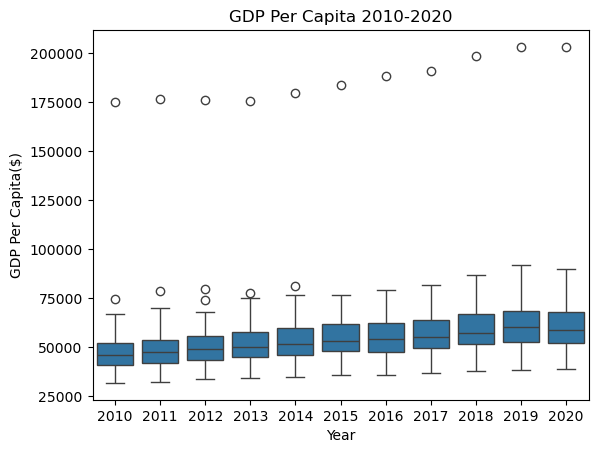

In [12]:
sns.boxplot(x=df['YEAR'], y=df['GDPPC']);
plt.xlabel('Year')
plt.ylabel('GDP Per Capita($)')
plt.title('GDP Per Capita 2010-2020');

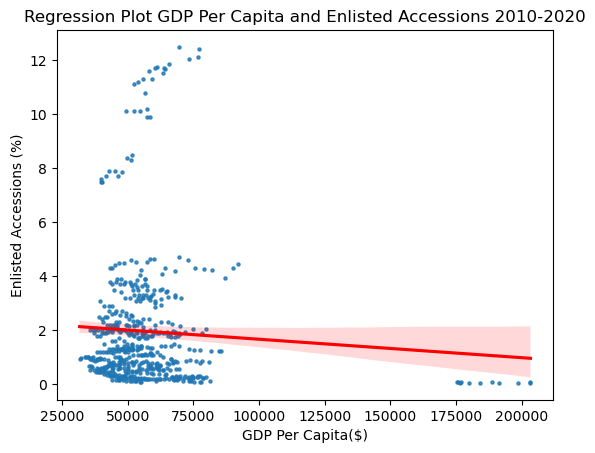

In [14]:
sns.regplot(x='GDPPC', y='DoD_TOT_ENACC_PER', data=df, scatter_kws={'s':5},  line_kws={'color':'red'})
plt.title('Regression Plot GDP Per Capita and Enlisted Accessions 2010-2020')
plt.xlabel('GDP Per Capita($)')
plt.ylabel('Enlisted Accessions (%)')
plt.show()
#A scatterplot overlayed with the regression line highlights the potential predictive relationship,         
#As the line better fits the data, the r-squared value of the regression output will get closer and closer to 1.

In [11]:
df_gdppc_enacc = df[['GDPPC', 'DoD_TOT_ENACC_PER']]
df_gdppc_enacc.head()

,GDPPC,DoD_TOT_ENACC_PER
0,37038.696366,1.90
1,74696.000740,0.26
2,39197.689151,2.50
3,34731.885511,1.00
4,52361.100281,11.10


In [ ]:
dataplot = sns.heatmap(df_gdppc_enacc.corr(numeric_only=True), cmap='coolwarm')
plt.show()